# Frame Classification using ResNet + LSTM

- Create the LSTM model
- Cross validate the model using different hyperparameters configurations
- Train the best model
- Evaluate the best model within the testing videos

In [1]:
from utils import *
import wandb
import os

/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-29 07:58:56,369	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-10-29 07:58:56,495	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


## Create the hyperparameters search space

Define the hyperparameters we want to check. 

In [ ]:
config = {
    'abs_path': '/home/sara/code/ratolins/code/', # project path 
    #'abs_path': 'wsl.localhost\Ubuntu\home\sara\code\ratolins\code',
    'sequence_length': [300, 600], 
    'backbone': 'resnet',
    'layers': 'lstm',
    'dropout_rate': 0.5,
    'num_layers': [1, 2, 3],
    'num_units': [64, 128],
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'epochs': 50,
    'batch_size': [8, 16],
    'es_monitor': 'val_prc',
    'es_mode': 'max',
    'es_patience': 5,
    'reuse_actors' : False
}

## Perform the Grid Search

In [7]:
import ray
import os

os.environ['RAY_DISABLE_MEMORY_MONITOR']='0'
os.environ['RAY_DEDUP_LOGS']='0'
os.environ['RAY_MEMORY_USAGE_THRESHOLD']='0.99'
os.environ['RAY_memory_monitor_refresh_ms']='0'
os.environ['LD_LIBRARY_PATH']='./miniconda3/envs/tfgpu/lib/libtinfo.so'

ray.init(num_gpus=1, object_store_memory=int(1e9)) # Limit the object store to use 1GB of the RAM
ray.cluster_resources()

2023-09-14 06:15:29,632	INFO worker.py:1621 -- Started a local Ray instance.


{'GPU': 1.0,
 'accelerator_type:G': 1.0,
 'object_store_memory': 1000000000.0,
 'CPU': 12.0,
 'node:__internal_head__': 1.0,
 'memory': 375469568.0,
 'node:172.22.236.123': 1.0}

In [ ]:
#ray.remote(num_gpus=1)


In [5]:
#ray.get_gpu_ids()

In [7]:
ray.shutdown()
#ray.init(num_gpus=1)

In [ ]:
best_config = grid_search(config)

(tune_train pid=9896) (56700, 2048)
(tune_train pid=9896) (56756, 2048) (72600, 3)
(tune_train pid=9896) (189, 300, 2048) (189, 300, 3)


2023-09-14 06:16:27,182	WARNING util.py:315 -- The `on_step_begin` operation took 0.781 s, which may be a performance bottleneck.
2023-09-14 06:16:37,879	WARNING util.py:315 -- The `on_step_begin` operation took 0.534 s, which may be a performance bottleneck.
2023-09-14 06:16:52,708	WARNING util.py:315 -- The `on_step_begin` operation took 4.007 s, which may be a performance bottleneck.
2023-09-14 06:16:52,999	WARNING worker.py:2037 -- A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead worker. RayTask ID: ffffffffffffffff1731dafd85c93379544dde3e01000000 Worker ID: f8614df333bc4a9a4fbf38798595c0525c4f65bfdac22ce7a1473821 Node ID: d150efcb14c7e19e1bf4540512d81c8c01b47984a993139e1cead208 Worker IP address: 172.22.236.123 Worker port: 33177 Worker PID: 9896 Worker exit type: SYSTEM_ERROR Worker exit detail: Worker unexpectedly exits with a connection error code 2. End of file. There are some potential r

(tune_train pid=10038) (189, 300, 2048) (189, 300, 3) [repeated 3x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)


2023-09-14 06:17:14,365	WARNING util.py:315 -- The `on_step_begin` operation took 1.317 s, which may be a performance bottleneck.
2023-09-14 06:17:25,081	WARNING util.py:315 -- The `on_step_begin` operation took 0.671 s, which may be a performance bottleneck.
2023-09-14 06:17:30,516	WARNING worker.py:2037 -- A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead worker. RayTask ID: ffffffffffffffffa542e33c41026febe5557a8401000000 Worker ID: c25561fe6b3597f257e48d0136c958d44742394ae01e40007a52abe2 Node ID: d150efcb14c7e19e1bf4540512d81c8c01b47984a993139e1cead208 Worker IP address: 172.22.236.123 Worker port: 36557 Worker PID: 10038 Worker exit type: SYSTEM_ERROR Worker exit detail: Worker unexpectedly exits with a connection error code 2. End of file. There are some potential root causes. (1) The process is killed by SIGKILL by OOM killer due to high memory usage. (2) ray stop --force is called. (3) The 

(tune_train pid=10140) (189, 300, 2048) (189, 300, 3) [repeated 3x across cluster]


2023-09-14 06:17:46,090	WARNING util.py:315 -- The `on_step_begin` operation took 0.784 s, which may be a performance bottleneck.
2023-09-14 06:17:57,016	WARNING util.py:315 -- The `on_step_begin` operation took 0.762 s, which may be a performance bottleneck.
2023-09-14 06:18:28,786	WARNING util.py:315 -- The `on_step_begin` operation took 0.761 s, which may be a performance bottleneck.
2023-09-14 06:18:39,789	WARNING util.py:315 -- The `on_step_begin` operation took 0.796 s, which may be a performance bottleneck.
2023-09-14 06:18:50,656	WARNING util.py:315 -- The `on_step_begin` operation took 0.668 s, which may be a performance bottleneck.
2023-09-14 06:19:43,385	WARNING util.py:315 -- The `on_step_begin` operation took 0.709 s, which may be a performance bottleneck.
2023-09-14 06:19:55,175	WARNING util.py:315 -- The `on_step_begin` operation took 1.391 s, which may be a performance bottleneck.
2023-09-14 06:20:06,052	WARNING util.py:315 -- The `on_step_begin` operation took 0.832 s,

In [10]:
best_config = {
    'abs_path': '/Users/saraalbarran/Jupyterfiles/Uni/ratolins/code2/', # project path 
    'sequence_length': 300, 
    'backbone': 'resnet',
    'layers': 'lstm',
    'dropout_rate': 0.5,
    'num_layers': 3,
    'num_units': 64,
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'epochs': 50,
    'batch_size': 8,
    'es_monitor': 'val_prc',
    'es_mode': 'max',
    'es_patience': 5,
}

## Final model Training & Evaluation

hola:(
79200
79200
(79200, 2048)
(79200, 2048) (79200, 3)
(264, 300, 2048) (264, 300, 3)
hola:(
33000
33000
(33000, 2048)
(33000, 2048) (33000, 3)
(110, 300, 2048) (110, 300, 3)
Running experiment for Grooming

Epoch 1: accuracy improved from -inf to 0.84711, saving model to resnet_lstm_accuracy_grooming.h5


/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: accuracy improved from 0.84711 to 0.91773, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 3: accuracy improved from 0.91773 to 0.91899, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 4: accuracy improved from 0.91899 to 0.93509, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 5: accuracy did not improve from 0.93509

Epoch 6: accuracy improved from 0.93509 to 0.94427, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 7: accuracy improved from 0.94427 to 0.94456, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 8: accuracy did not improve from 0.94456

Epoch 9: accuracy did not improve from 0.94456

Epoch 10: accuracy did not improve from 0.94456

Epoch 11: accuracy improved from 0.94456 to 0.94691, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 12: accuracy did not improve from 0.94691

Epoch 13: accuracy did not improve from 0.94691

Epoch 14: accuracy improved from 0.94691 to 0.95389, saving model to resnet_lstm_accuracy_groom

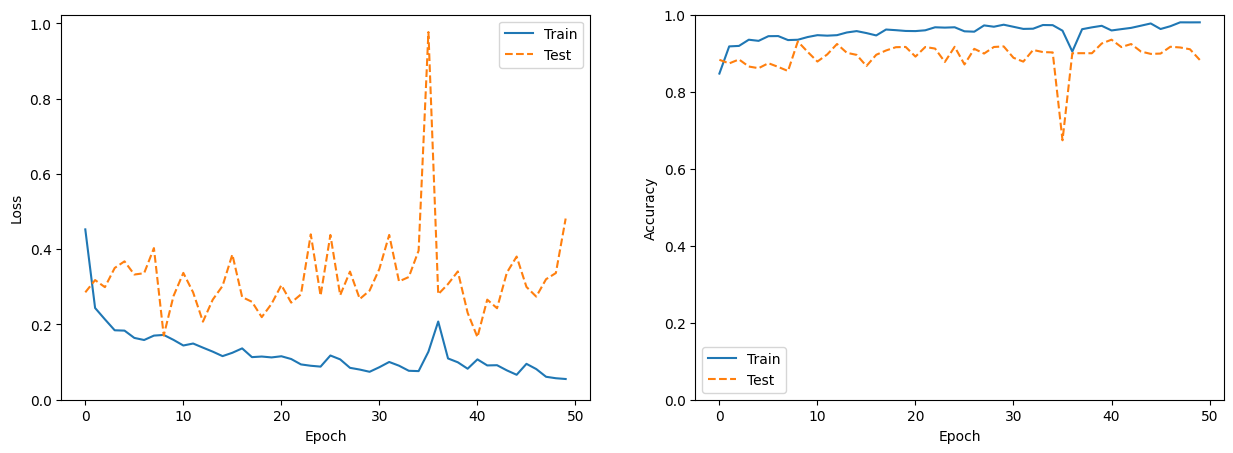

14/14 [==============================] - 1s 54ms/step


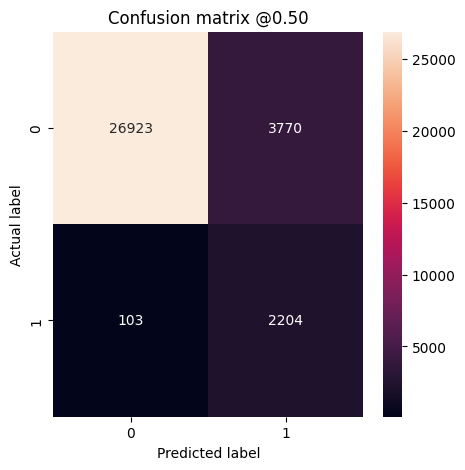

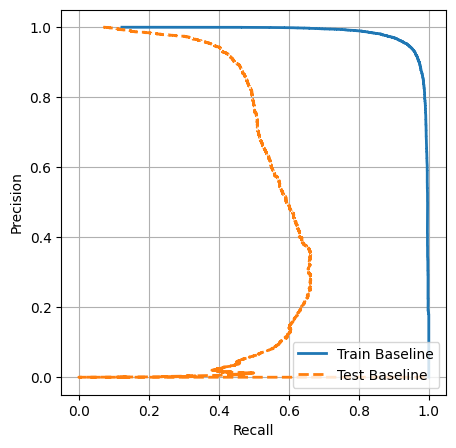

Running experiment for Mid Rearing


/Users/saraalbarran/Jupyterfiles/Uni/ratolins/code2/notebooks/utils.py:355: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_metrics = pd.concat([



Epoch 1: accuracy improved from -inf to 0.63727, saving model to resnet_lstm_accuracy_mid_rearing.h5


/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: accuracy improved from 0.63727 to 0.73658, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 3: accuracy improved from 0.73658 to 0.81163, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 4: accuracy improved from 0.81163 to 0.82044, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 5: accuracy improved from 0.82044 to 0.83840, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 6: accuracy improved from 0.83840 to 0.84545, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 7: accuracy improved from 0.84545 to 0.85429, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 8: accuracy did not improve from 0.85429

Epoch 9: accuracy improved from 0.85429 to 0.85957, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 10: accuracy did not improve from 0.85957

Epoch 11: accuracy improved from 0.85957 to 0.86948, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 12: accuracy did not improve from 0.86948

Epoch 13: ac

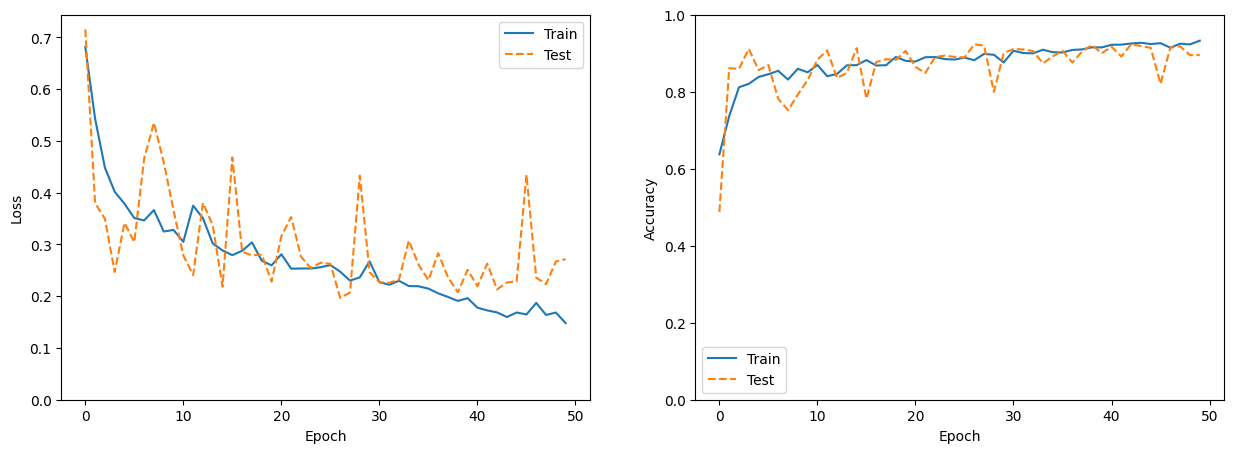

14/14 [==============================] - 1s 54ms/step


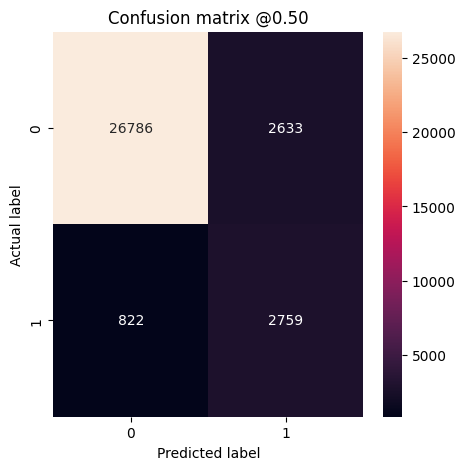

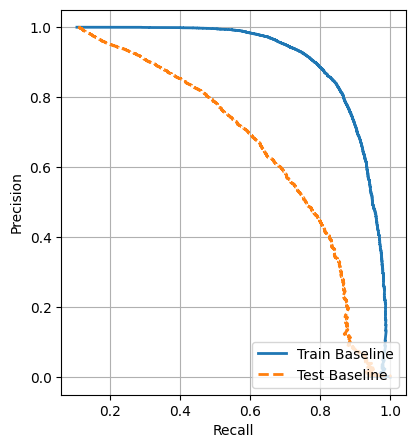

Running experiment for Wall Rearing

Epoch 1: accuracy improved from -inf to 0.63657, saving model to resnet_lstm_accuracy_wall_rearing.h5


/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: accuracy improved from 0.63657 to 0.82909, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 3: accuracy improved from 0.82909 to 0.86184, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 4: accuracy improved from 0.86184 to 0.87692, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 5: accuracy did not improve from 0.87692

Epoch 6: accuracy improved from 0.87692 to 0.89678, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 7: accuracy did not improve from 0.89678

Epoch 8: accuracy did not improve from 0.89678

Epoch 9: accuracy improved from 0.89678 to 0.89859, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 10: accuracy improved from 0.89859 to 0.90472, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 11: accuracy did not improve from 0.90472

Epoch 12: accuracy improved from 0.90472 to 0.90610, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 13: accuracy improved from 0.90610 to 0.91324, saving mo

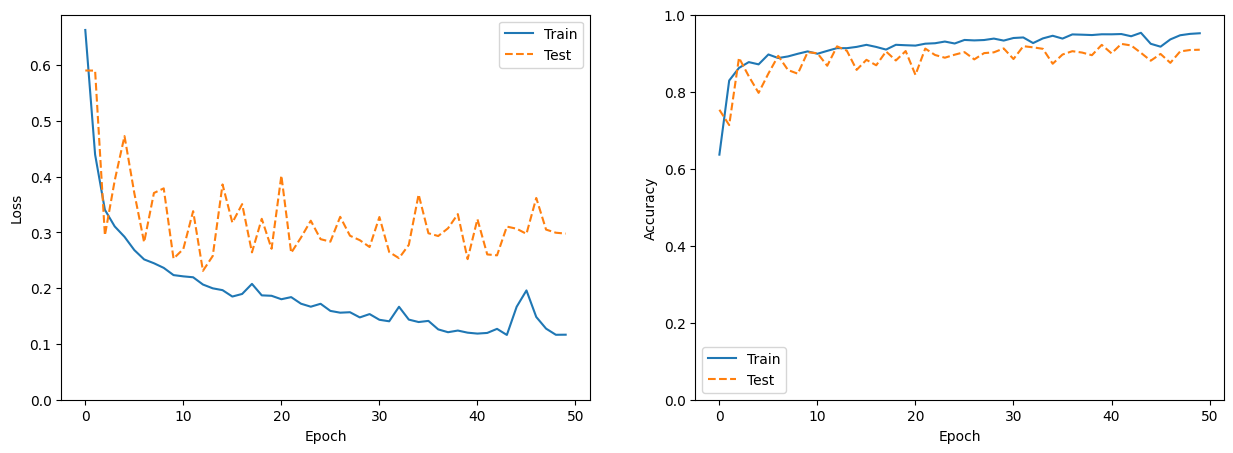

14/14 [==============================] - 1s 71ms/step


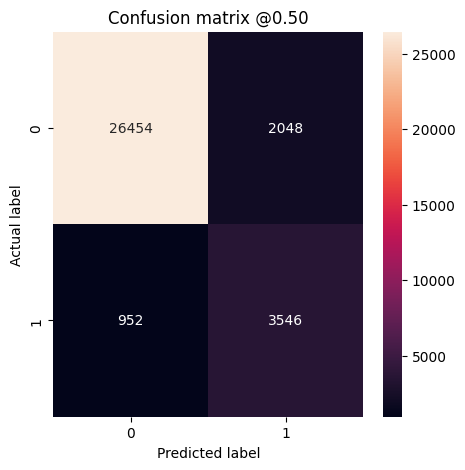

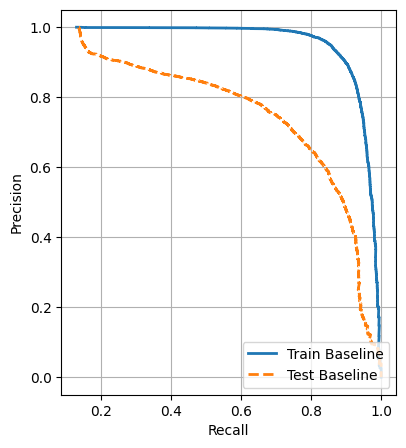

In [12]:
metrics = train_test_model(best_config)